# Cube dataset evaluation

## Number of epochs
I will try to find on how many epochs should I train the network.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from som import KohonenNetwork, GaussianNeighboringFunc
import pickle

In [2]:
data_dir = Path("data")

cube = pd.read_csv(data_dir / "cube.csv")
hexagon = pd.read_csv(data_dir / "hexagon.csv")

Text(0.5, 0.92, 'Original clusters in the hexagon dataset')

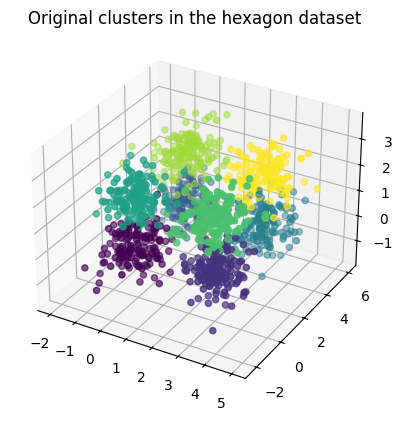

In [3]:

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(cube["x"], cube["y"], cube["z"], c=cube["c"])
plt.title("Original clusters in the cube dataset")


using 8 clusters I will train the network with default parameters to determine the network performance on different epochs. I will use the *Davies-Bouldin*, *homogenity* and *completness* and visuall assesement to do so.

In [37]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

In [5]:
M = 2
N = 4

max_epochs = 200
n_trials = 10


In [35]:
koh = KohonenNetwork(M, N, vec_dim=3, neighboring_func=GaussianNeighboringFunc(0.4))

koh.fit(cube[["x", "y", "z"]].values, 200, verbose=True, history=False)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


[array([2, 2, 2, ..., 2, 2, 2], dtype=int64),
 array([3, 3, 3, ..., 2, 2, 2], dtype=int64),
 array([2, 2, 2, ..., 2, 2, 2], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int64),
 array([2, 2, 2, ..., 3, 3, 3], dt

In [43]:
def save_scores(scores, filename):
    with open(Path("scores") / ("cube_" + filename + ".pkl"), "wb") as f:
        pickle.dump(scores, f)

def load_scores(filename):
    with open(Path("scores") / ("cube_" + filename + ".pkl"), "rb") as f:
        return pickle.load(f)
    

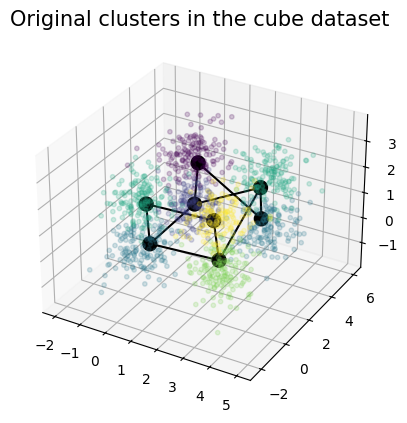

In [56]:

fig = plt.figure()

ax = plt.axes(projection='3d')

labels = koh.predict(cube[["x", "y", "z"]].values)

ax.scatter3D(cube["x"], cube["y"], cube["z"], c=labels, s=10, alpha = 0.2)
plt.title("Original clusters in the cube dataset", fontsize=15)

koh.plot_graph(show=False, ax=ax, s=100, alpha=1, color="black")

ax.grid(True)
ax.set_axis_on()
plt.style.use('default')

In [ ]:

scores = list(range(n_trials))
labels = hexagon["c"].values

for trail in range(n_trials):
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    koh = KohonenNetwork(M, N, GaussianNeighboringFunc(initial_neighbouring_radius=0.5), lambda_param=1, initial_learning_rate=1, vec_dim = 3)
    print(f"Trail {trail}")
    old_labels = koh.fit(cube[["x", "y", "z"]].values, max_epochs,  verbose = False, history=True)
    print(f"Finished training in trail {trail}")
    for epoch in range(1, max_epochs):
        som_labels = old_labels[epoch]

        scores[trail]["homogeneity"].append(homogeneity_score(cube["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(cube["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(cube["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(cube[["x", "y", "z"]].values, som_labels))


#save_scores(scores, "cube_epochs")

In [26]:
def save_scores(scores, filename):
    with open(Path("scores") / (filename + ".pkl"), "wb") as f:
        pickle.dump(scores, f)

def load_scores(filename):
    with open(Path("scores") / (filename + ".pkl"), "rb") as f:
        return pickle.load(f)
    

In [24]:
test_name = "cube_epochs_lambda_1"
#save_scores(scores, test_name)

In [57]:
scores = load_scores("epochs_lambda_1")

In [58]:
labels = koh.predict(hexagon[["x", "y"]].values)
plt.scatter(hexagon["x"], hexagon["y"], c=labels)
koh.plot_graph()

ValueError: operands could not be broadcast together with shapes (8,3) (2,) 

In [59]:
def create_summary_plots(scores, values, scores_start = 0, scores_end = -1, errorevery=10, plot_title = "", suptitle="", save_path=None, baseline = True, n_trials = 10):
    if scores_end == -1:
        scores_end = scores_start + len(values) - 1
    
    mean_scores = {key: np.mean([scores[trail][key] for trail in range(n_trials)], axis=0) for key in scores[0].keys()}
    std_scores = {key: np.std([scores[trail][key] for trail in range(n_trials)], axis=0) for key in scores[0].keys()}

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    axs[0, 0].errorbar(values[scores_start:scores_end], mean_scores["homogeneity"][scores_start:scores_end], yerr = std_scores["homogeneity"][scores_start:scores_end], label="SOM clustering", errorevery = errorevery); axs[0, 0].set_title("Homogeneity")
    axs[0, 1].errorbar(values[scores_start:scores_end], mean_scores["completeness"][scores_start:scores_end], yerr = std_scores["completeness"][scores_start:scores_end], label="SOM clustering", errorevery = errorevery); axs[0, 1].set_title("Completeness")
    axs[0, 2].errorbar(values[scores_start:scores_end], mean_scores["v_measure"][scores_start:scores_end], yerr = std_scores["v_measure"][scores_start:scores_end], label="SOM clustering", errorevery = errorevery); axs[0, 2].set_title("V-measure")

    axs[1, 0].errorbar(values[scores_start:scores_end], mean_scores["silhouette"][scores_start:scores_end], yerr = std_scores["silhouette"][scores_start:scores_end], label="SOM clustering", errorevery = errorevery); axs[1, 0].set_title("Silhouette")
    axs[1, 1].errorbar(values[scores_start:scores_end], mean_scores["davies_bouldin"][scores_start:scores_end], yerr = std_scores["davies_bouldin"][scores_start:scores_end], label="SOM clustering", errorevery = errorevery); axs[1, 1].set_title("Davies-Bouldin")
    axs[1, 2].errorbar(values[scores_start:scores_end], mean_scores["calinski_harabasz"][scores_start:scores_end], yerr = std_scores["calinski_harabasz"][scores_start:scores_end], label="SOM clustering", errorevery = errorevery); axs[1, 2].set_title("Calinski-Harabasz")

    if baseline:
        axs[1,0].axhline(silhouette_score(hexagon[['x', 'y']].values, hexagon["c"].values), c="red", label="Original clustering")
        axs[1,1].axhline(davies_bouldin_score(hexagon[['x', 'y']].values, hexagon["c"].values), c="red", label="Original clustering")
        axs[1,2].axhline(calinski_harabasz_score(hexagon[['x', 'y']].values, hexagon["c"].values), c="red", label="Original clustering")

    for i in range(2):
        for j in range(3):
            
            axs[i, j].set_xlabel(plot_title)
            axs[i, j].set_ylabel("Score")
            axs[i, j].legend()


    plt.suptitle(suptitle)
    
    if save_path:
        plt.savefig(Path("plots") / (save_path + ".png"))  
    return fig, axs
    

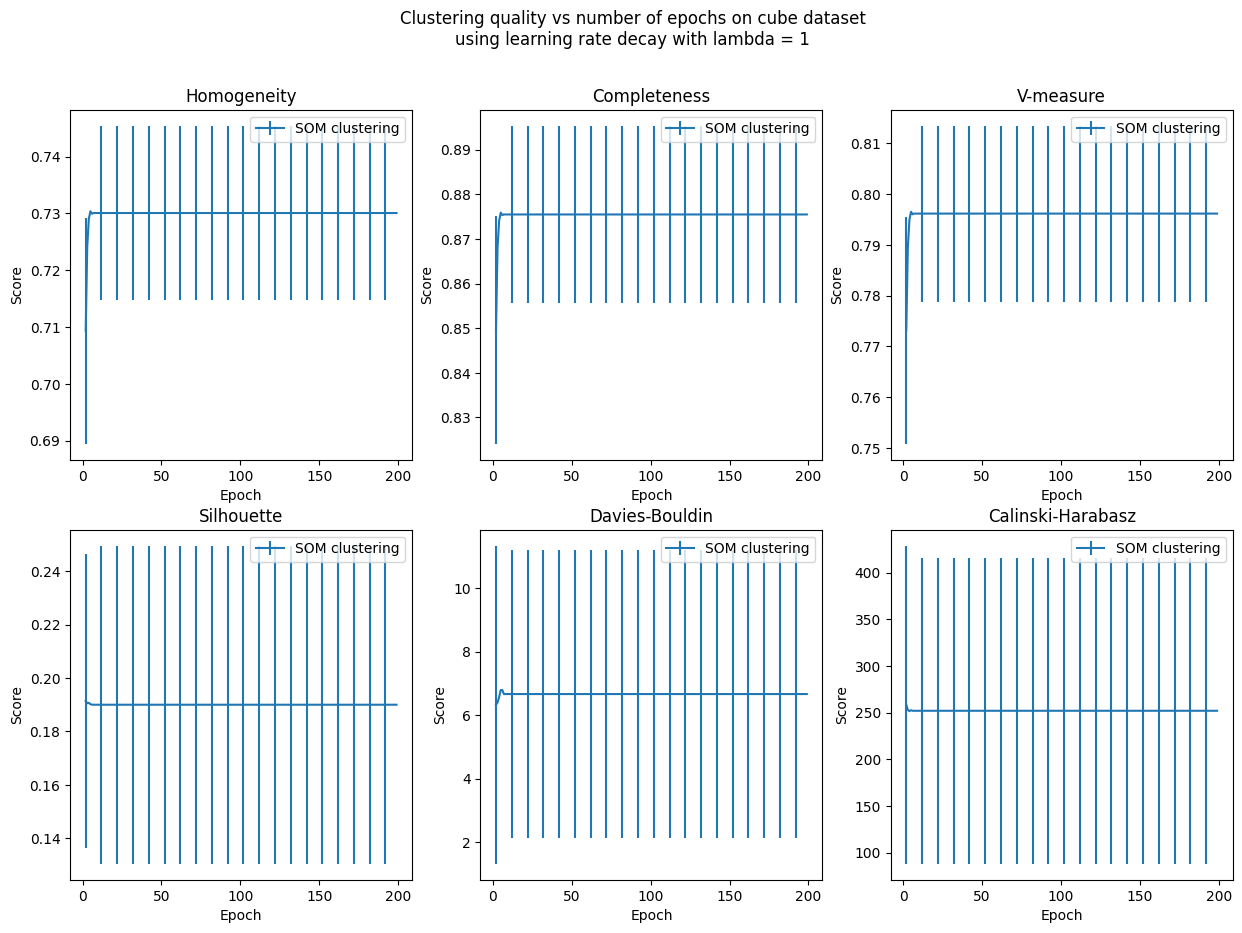

In [61]:
create_summary_plots(scores, list(range(1, max_epochs)), scores_start = 1, baseline=False, plot_title="Epoch", suptitle="Clustering quality vs number of epochs on cube dataset\nusing learning rate decay with lambda = 1", save_path=test_name)

plt.show()

In [108]:
M = 2
N = 3

max_epochs = 200
n_trials = 10

scores = list(range(n_trials))
labels = hexagon["c"].values

for trail in range(n_trials):
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    koh = KohonenNetwork(M, N, GaussianNeighboringFunc(initial_neighbouring_radius=0.5), lambda_param=5, initial_learning_rate=1)
    print(f"Trail {trail}")
    old_labels = koh.fit(hexagon[["x", "y"]].values, max_epochs, verbose = False, history=True)
    print(f"Finished training in trail {trail}")
    for epoch in range(1, max_epochs):
        som_labels = old_labels[epoch]

        scores[trail]["homogeneity"].append(homogeneity_score(hexagon["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(hexagon["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(hexagon["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(hexagon[["x", "y"]].values, som_labels))

save_scores(scores, "epochs_lambda_5")

Trail 0
Finished training in trail 0
Trail 1
Finished training in trail 1
Trail 2
Finished training in trail 2
Trail 3
Finished training in trail 3
Trail 4
Finished training in trail 4
Trail 5
Finished training in trail 5
Trail 6
Finished training in trail 6
Trail 7
Finished training in trail 7
Trail 8
Finished training in trail 8
Trail 9
Finished training in trail 9


In [63]:

scores = load_scores("epochs_lambda_5")

(<Figure size 1500x1000 with 6 Axes>,
 array([[<Axes: title={'center': 'Homogeneity'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'Completeness'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'V-measure'}, xlabel='Epoch', ylabel='Score'>],
        [<Axes: title={'center': 'Silhouette'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'Davies-Bouldin'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'Calinski-Harabasz'}, xlabel='Epoch', ylabel='Score'>]],
       dtype=object))

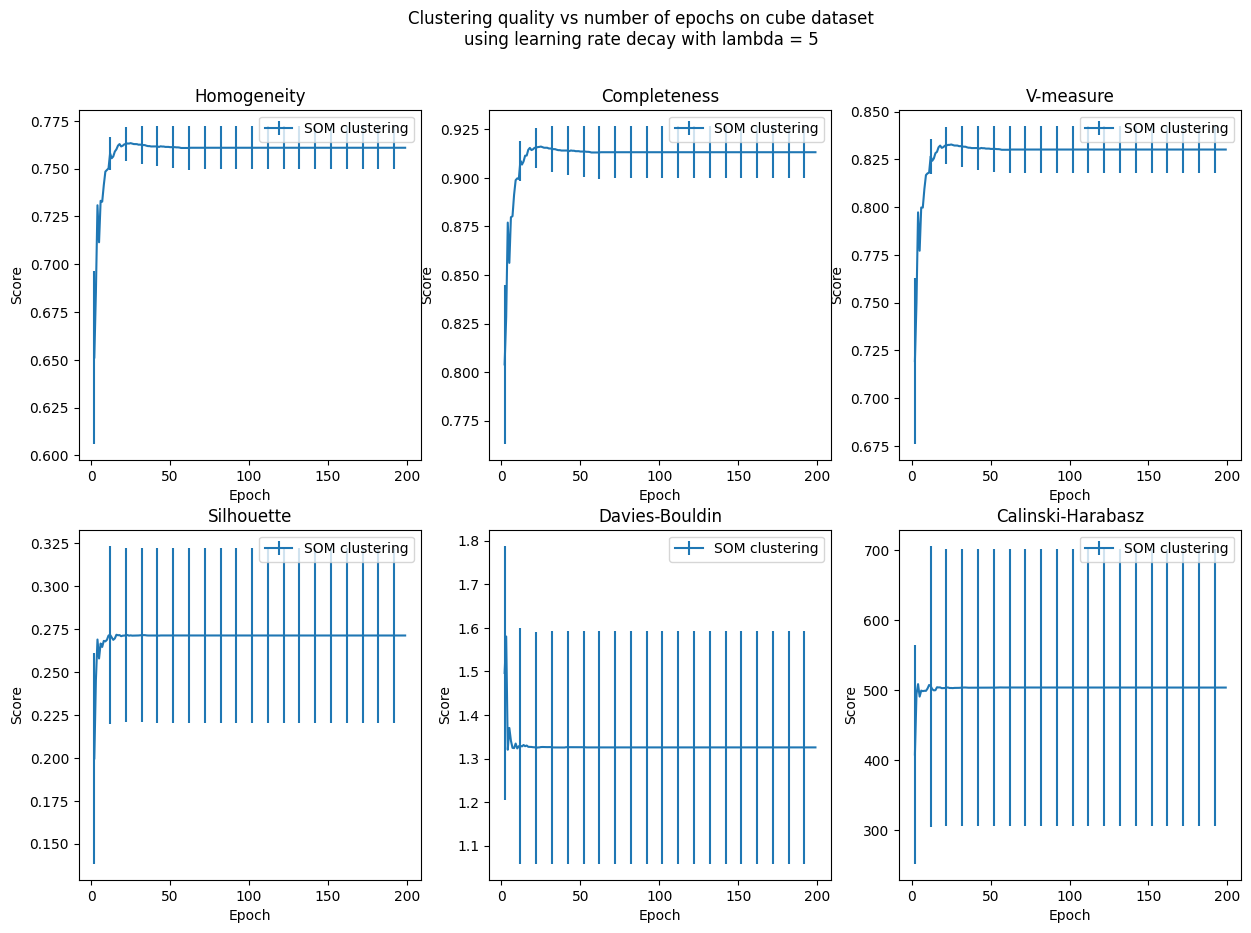

In [64]:
create_summary_plots(scores, list(range(1, max_epochs)), scores_start = 1, baseline=False, plot_title="Epoch", suptitle="Clustering quality vs number of epochs on cube dataset\nusing learning rate decay with lambda = 5", save_path="epochs_lambda_5")

In [111]:
M = 2
N = 3

max_epochs = 200
n_trials = 10

scores = list(range(n_trials))
labels = hexagon["c"].values

for trail in range(n_trials):
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    koh = KohonenNetwork(M, N, GaussianNeighboringFunc(initial_neighbouring_radius=0.5), lambda_param=10, initial_learning_rate=1)
    print(f"Trail {trail}")
    old_labels = koh.fit(hexagon[["x", "y"]].values, max_epochs, verbose = False, history=True)
    print(f"Finished training in trail {trail}")
    for epoch in range(1, max_epochs):
        som_labels = old_labels[epoch]

        scores[trail]["homogeneity"].append(homogeneity_score(hexagon["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(hexagon["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(hexagon["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(hexagon[["x", "y"]].values, som_labels))

save_scores(scores, "cube_epochs_lambda_10")

Trail 0
Finished training in trail 0
Trail 1
Finished training in trail 1
Trail 2
Finished training in trail 2
Trail 3
Finished training in trail 3
Trail 4
Finished training in trail 4
Trail 5
Finished training in trail 5
Trail 6
Finished training in trail 6
Trail 7
Finished training in trail 7
Trail 8
Finished training in trail 8
Trail 9
Finished training in trail 9


In [66]:
scores = load_scores("epochs_lambda_10")

(<Figure size 1500x1000 with 6 Axes>,
 array([[<Axes: title={'center': 'Homogeneity'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'Completeness'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'V-measure'}, xlabel='Epoch', ylabel='Score'>],
        [<Axes: title={'center': 'Silhouette'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'Davies-Bouldin'}, xlabel='Epoch', ylabel='Score'>,
         <Axes: title={'center': 'Calinski-Harabasz'}, xlabel='Epoch', ylabel='Score'>]],
       dtype=object))

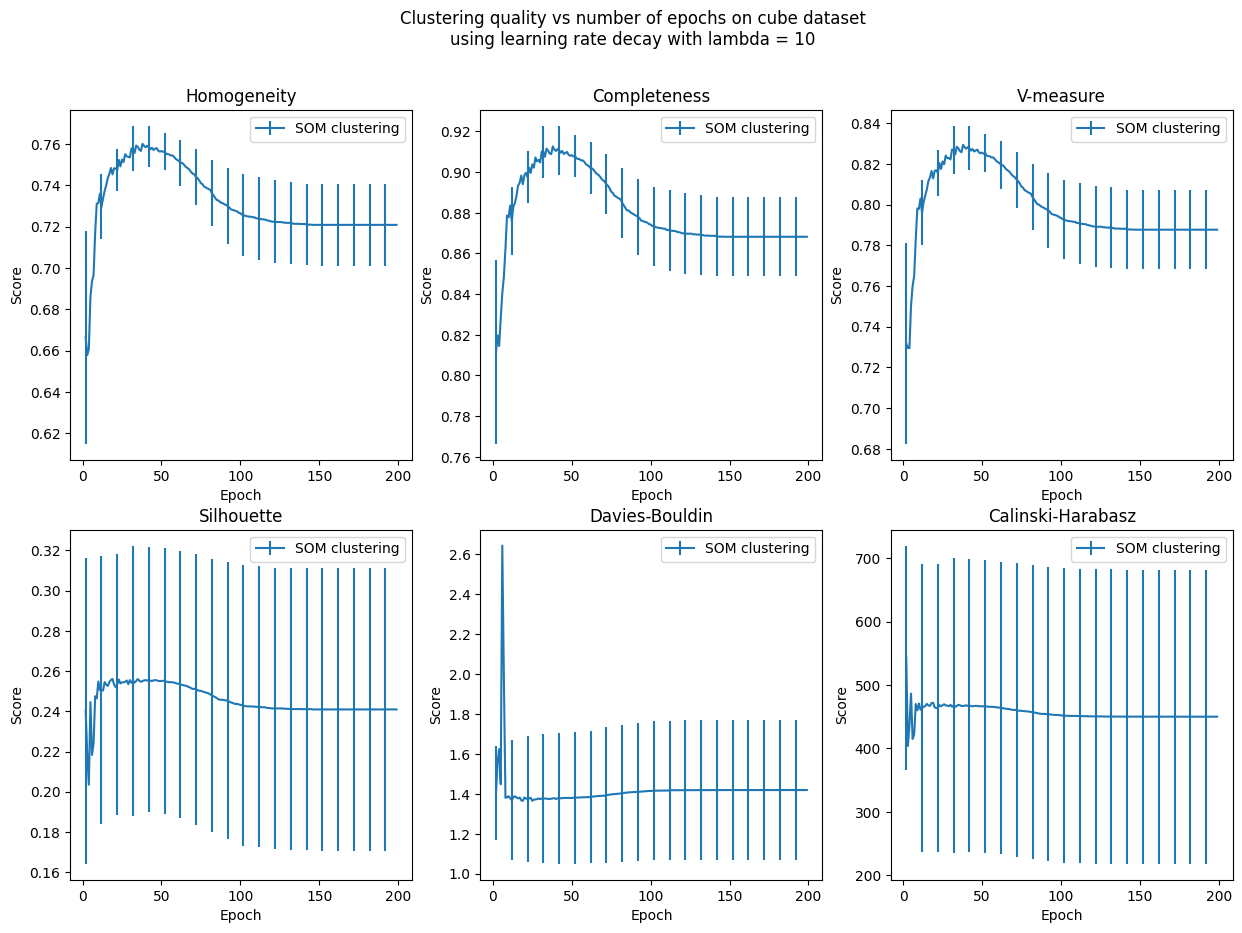

In [67]:
create_summary_plots(scores, list(range(1, max_epochs)), scores_start = 1, baseline=False, plot_title="Epoch", suptitle="Clustering quality vs number of epochs on cube dataset\nusing learning rate decay with lambda = 10", save_path="epochs_lambda_10")

# Cluster size

In [49]:
import math

def closestDivisors(n):
    a = round(math.sqrt(n))
    while n%a > 0: 
        a -= 1
    return a,n//a

In [51]:

cluster_sizes = [4, 6, 8, 10, 14, 20, 30, 40]
cluster_dims = [closestDivisors(size) for size in cluster_sizes]
cluster_dims

[(2, 2), (2, 3), (2, 4), (2, 5), (2, 7), (4, 5), (5, 6), (5, 8)]

In [68]:
num_trails = 10
scores = list(range(num_trails))
labels = hexagon["c"].values

for trail in range(num_trails):
    print(f"Trail {trail}")
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    for dim in cluster_dims:
        size = dim[0] * dim[1]
        epochs = 10 * size
        koh = KohonenNetwork(dim[0], dim[1], GaussianNeighboringFunc(initial_neighbouring_radius=0.5), vec_dim=3, lambda_param=5)    
        koh.fit(cube[["x", "y", "z"]].values, epochs, history=False, verbose=False)
        som_labels = koh.predict(cube[["x", "y", "z"]].values, return_labels=True)
        scores[trail]["homogeneity"].append(homogeneity_score(cube["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(cube["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(cube["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(cube[["x", "y", "z"]].values, som_labels))


save_scores(scores, "cluster_sizes_05_lambda_5")

Trail 0
Trail 1
Trail 2
Trail 3


In [29]:
# save_scores(scores, "cluster_sizes")
scores = load_scores("cluster_sizes")

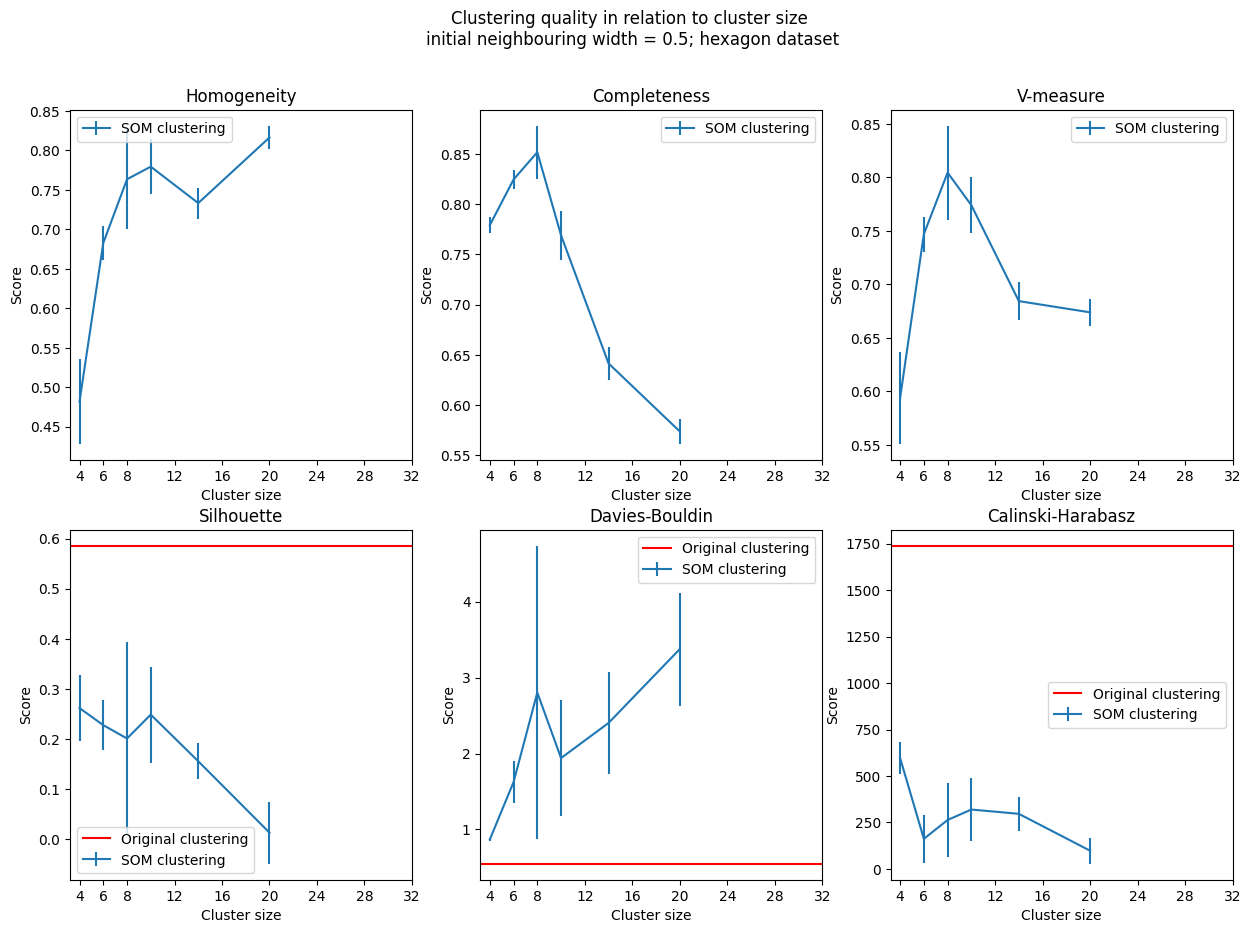

In [31]:
fig, axs = create_summary_plots(scores, cluster_sizes, scores_start = 0, n_trials=10, errorevery=1, baseline=True, plot_title="Cluster size", suptitle="Clustering quality in relation to cluster size \ninitial neighbouring width = 0.5; cube dataset", save_path="cluster_sizes_05")

for i in range(2):
    for j in range(3):
        #axs[i, j].axvline(6, c="green")
        axs[i, j].set_xticks(cluster_sizes)
plt.show()

In [188]:
num_trails = 10
scores = list(range(num_trails))
labels = hexagon["c"].values

for trail in range(num_trails):
    print(f"Trail {trail}")
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    for dim in cluster_dims:
        size = dim[0] * dim[1]
        epochs = 10 * size
        koh = KohonenNetwork(dim[0], dim[1], GaussianNeighboringFunc(initial_neighbouring_radius=0.25), vec_dim=2)    
        koh.fit(hexagon[["x", "y"]].values, epochs, history=False, verbose=False)
        som_labels = koh.predict(hexagon[["x", "y"]].values, return_labels=True)
        scores[trail]["homogeneity"].append(homogeneity_score(hexagon["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(hexagon["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(hexagon["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(hexagon[["x", "y"]].values, som_labels))
        
save_scores(scores, "cluster_sizes_025")

Trail 0
Trail 1
Trail 2
Trail 3
Trail 4
Trail 5
Trail 6
Trail 7
Trail 8
Trail 9


In [32]:
scores = load_scores("cluster_sizes_025")

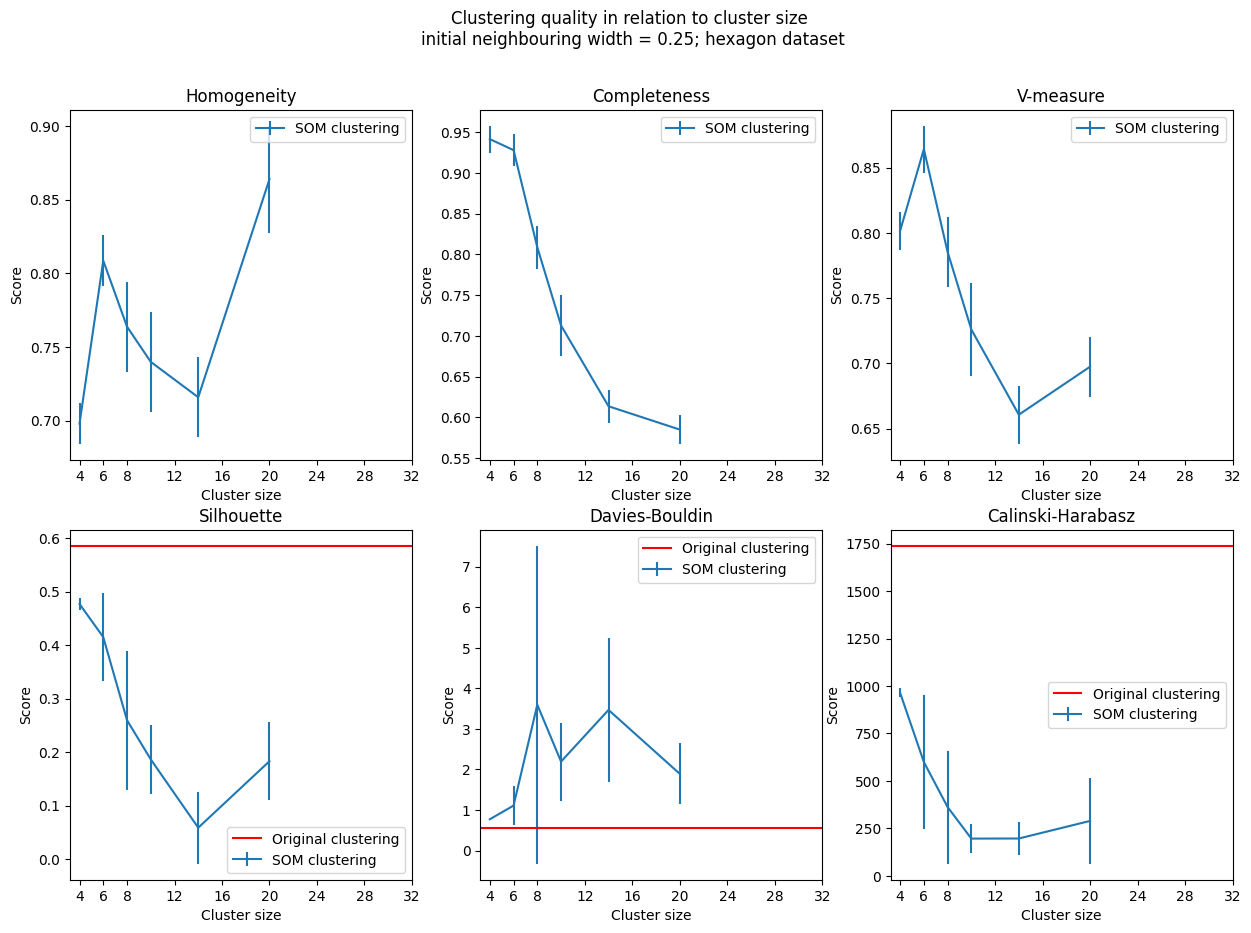

In [33]:
fig, axs = create_summary_plots(scores, cluster_sizes, scores_start = 0, n_trials=10, errorevery=1, baseline=True, plot_title="Cluster size", suptitle="Clustering quality in relation to cluster size \ninitial neighbouring width = 0.25; cube dataset", save_path="cluster_sizes_025")

for i in range(2):
    for j in range(3):
        #axs[i, j].axvline(6, c="green")
        axs[i, j].set_xticks([4, 6, 8, 12, 16, 20, 24, 28, 32])
plt.show()

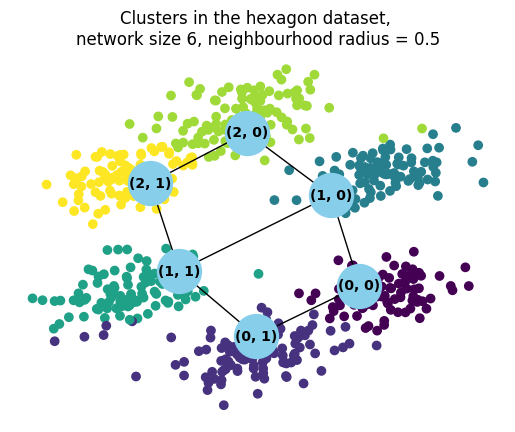

<Figure size 640x480 with 0 Axes>

In [195]:

koh = KohonenNetwork(3, 2, GaussianNeighboringFunc(initial_neighbouring_radius=0.5), lambda_param=1, initial_learning_rate=1, init_method="dataset", dataset=hexagon[["x", "y"]].values)

koh.fit(hexagon[["x", "y"]].values, 60, verbose=False)

labels = koh.predict(hexagon[["x", "y"]].values)


plt.scatter(hexagon["x"], hexagon["y"], c=labels)
plt.title("Clusters in the cube dataset, \nnetwork size 6, neighbourhood radius = 0.5")
koh.plot_graph()
plt.savefig("plots/hexagon_6_clusters.png")


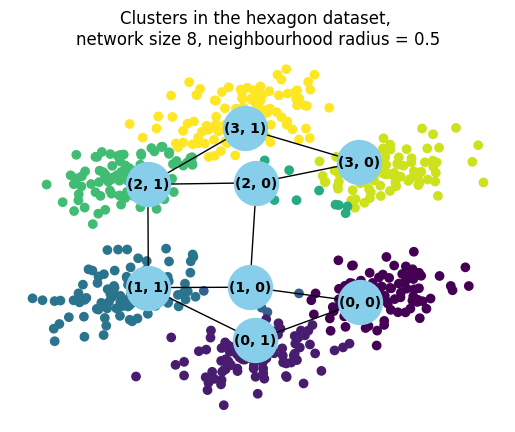

<Figure size 640x480 with 0 Axes>

In [197]:

koh = KohonenNetwork(4, 2, GaussianNeighboringFunc(initial_neighbouring_radius=0.5), lambda_param=1, initial_learning_rate=1, init_method="dataset", dataset=hexagon[["x", "y"]].values)

koh.fit(hexagon[["x", "y"]].values, 80, verbose=False)

labels = koh.predict(hexagon[["x", "y"]].values)


plt.scatter(hexagon["x"], hexagon["y"], c=labels)
plt.title("Clusters in the cube dataset, \nnetwork size 8, neighbourhood radius = 0.5")
koh.plot_graph()
plt.savefig("plots/hexagon_8_clusters.png")


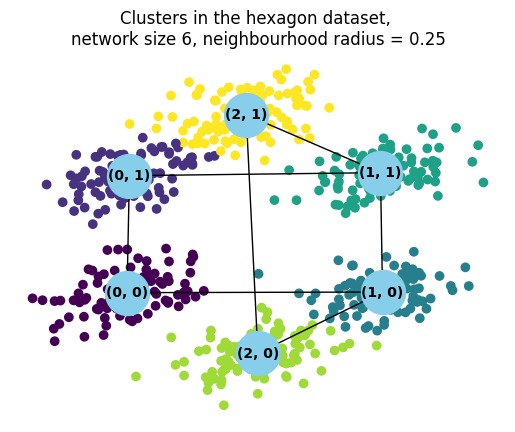

<Figure size 640x480 with 0 Axes>

In [198]:

koh = KohonenNetwork(3, 2, GaussianNeighboringFunc(initial_neighbouring_radius=0.25), lambda_param=1, initial_learning_rate=1, init_method="dataset", dataset=hexagon[["x", "y"]].values)

koh.fit(hexagon[["x", "y"]].values, 60, verbose=False)

labels = koh.predict(hexagon[["x", "y"]].values)


plt.scatter(hexagon["x"], hexagon["y"], c=labels)
plt.title("Clusters in the cube dataset, \nnetwork size 6, neighbourhood radius = 0.25")
koh.plot_graph()
plt.savefig("plots/hexagon_6_clusters_025.png")

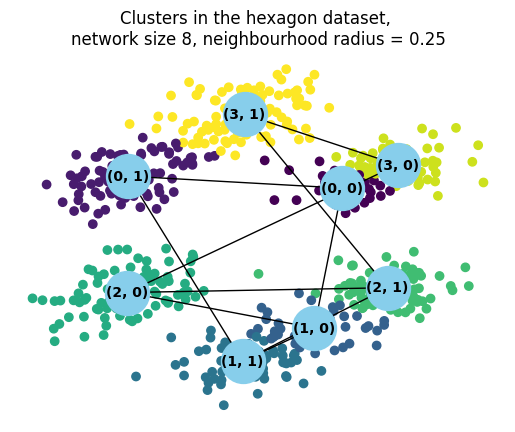

In [199]:

koh = KohonenNetwork(4, 2, GaussianNeighboringFunc(initial_neighbouring_radius=0.25), lambda_param=1, initial_learning_rate=1, init_method="dataset", dataset=hexagon[["x", "y"]].values)

koh.fit(hexagon[["x", "y"]].values, 80, verbose=False)

labels = koh.predict(hexagon[["x", "y"]].values)


plt.scatter(hexagon["x"], hexagon["y"], c=labels)
plt.title("Clusters in the cube dataset, \nnetwork size 8, neighbourhood radius = 0.25")
plt.savefig("plots/hexagon_8_clusters_025.png")
koh.plot_graph()

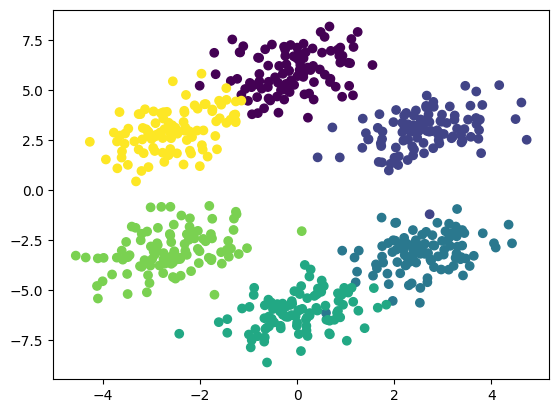

In [149]:
plt.scatter(hexagon["x"], hexagon["y"], c=hexagon["c"])

# Szerokość sąsiedztwa

In [36]:
widths = np.linspace(0.1, 1, 10)


In [200]:
widths = np.linspace(0.1, 1, 10)

num_trails = 10

scores = list(range(num_trails))
epochs = 60

labels = hexagon["c"].values

for trail in range(num_trails):
    print(f"Trail {trail}")
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    for width in widths:
        koh = KohonenNetwork(2, 3, GaussianNeighboringFunc(initial_neighbouring_radius=width), vec_dim=2)    
        koh.fit(hexagon[["x", "y"]].values, epochs, history=False, verbose=False)
        som_labels = koh.predict(hexagon[["x", "y"]].values, return_labels=True)
        scores[trail]["homogeneity"].append(homogeneity_score(hexagon["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(hexagon["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(hexagon["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(hexagon[["x", "y"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(hexagon[["x", "y"]].values, som_labels))
        
save_scores(scores, "neighbouring_widths")

Trail 0
Trail 1
Trail 2
Trail 3
Trail 4
Trail 5
Trail 6
Trail 7
Trail 8
Trail 9


In [34]:
scores = load_scores("neighbouring_widths")

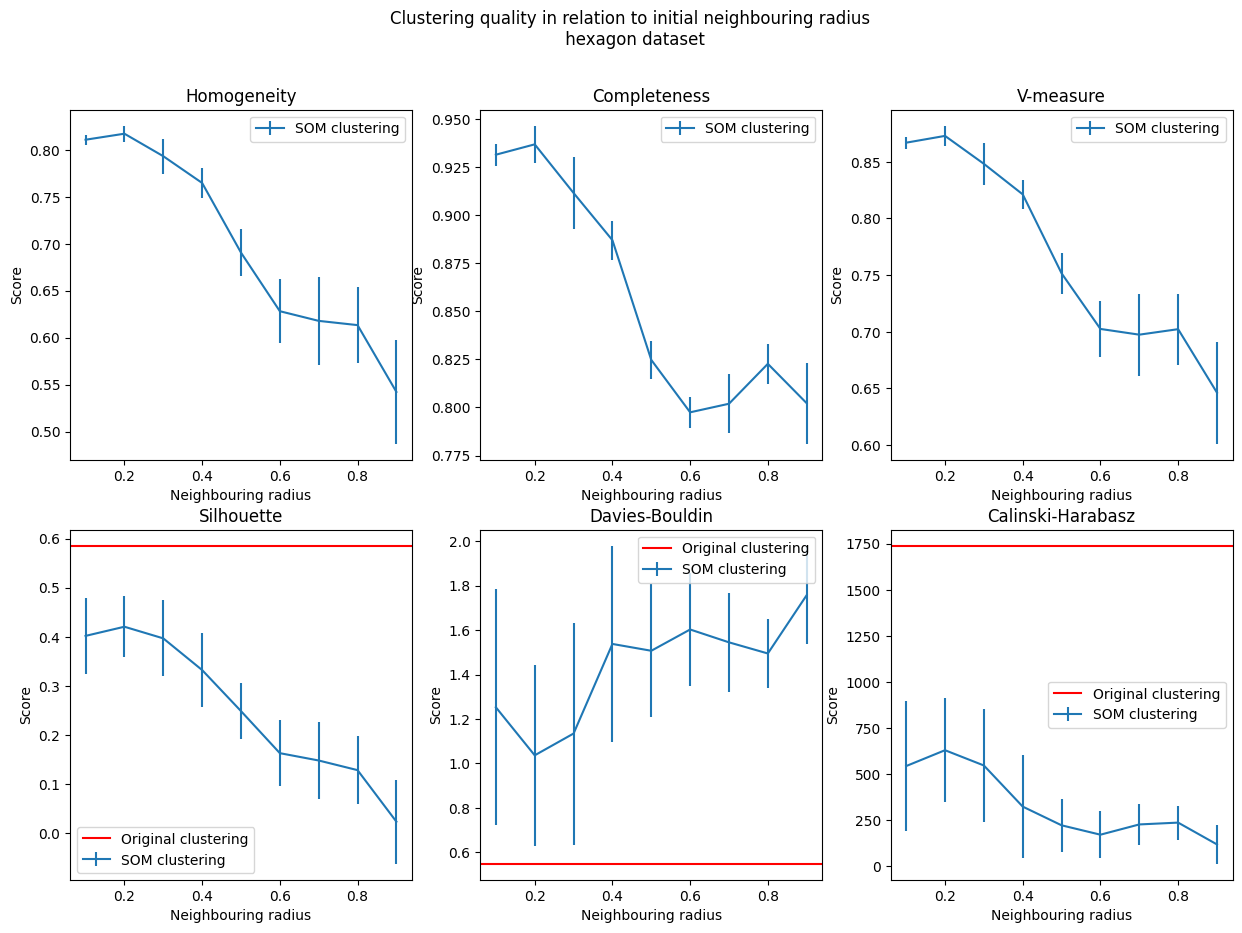

In [37]:
fig, axs = create_summary_plots(scores, widths, scores_start = 0, n_trials=10, errorevery=1, baseline=True, plot_title="Neighbouring radius", suptitle="Clustering quality in relation to initial neighbouring radius \n cube dataset", save_path="neighbouring_radius")

plt.show()